<a href="https://colab.research.google.com/github/CanopySimulations/canopy-python-examples/blob/master/loading_vector_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upgrade Runtime
This cell ensures the runtime supports `asyncio` async/await, and is needed on Google Colab. If the runtime is upgraded, you will be prompted to restart it, which you should do before continuing execution.

In [0]:
!pip install "ipython>=7"

# Set Up Environment

### Import required libraries

In [0]:
!pip install -q 'canopy==8.13'

In [0]:
import canopy
import logging
import matplotlib.pyplot as plt

logging.basicConfig(level=logging.INFO)

### Authenticate

In [0]:
authentication_data = canopy.prompt_for_authentication()
session = canopy.Session(authentication_data)

# Set Up Example

Run a quick ApexSim exploration.

In [4]:
logging.info('Loading configs...')

default_car = await canopy.load_default_config(
    session, 'car', 'Canopy F1 Car 2019')

default_weather = await canopy.load_default_config(
    session, 'weather', '25 deg, dry')

default_exploration = await canopy.load_default_config(
    session, 'exploration', 'Automated Test Monte Carlo')

# We'll run a very small exploration for this example
default_exploration.data.design.numberOfPoints = 3

logging.info('Creating study...')

study_id = await canopy.create_study(
    session,
    'apexSim',
    'Loading Vector Results Example',
    [
        default_car,
        default_weather,
        default_exploration,
    ])

logging.info('Waiting for study to complete...')

wait_result = await canopy.wait_for_study(
    session,
    study_id,
    timeout_seconds=300)
    
logging.info('Sim Version: {}'.format(wait_result.document.sim_version))    
logging.info('Succeded Simulations: {}/{}'.format(
    wait_result.succeeded_simulation_count, 
    wait_result.simulation_count))

INFO:root:Loading configs...
INFO:root:Creating study...
INFO:root:Waiting for study to complete...
INFO:root:Sim Version: 1.3371
INFO:root:Succeded Simulations: 3/3


# Example: Loading Vector Results

## Loading for a single job
We can load the vector results for an individual job by passing a list of channel names to the `load_study_job` function. Note we are specifically loading the `ApexSim` vector results here. If we also wanted the `StraightSim` results we can fetch them in a second call.

In [5]:
job_0 = await canopy.load_study_job(
    session,
    study_id,
    'ApexSim',
    job_index=0,
    channel_names=[
        'vCar',
        'hRideF',
        'hRideR'
    ])
    
job_0.vector_data

INFO:canopy.load_study_job:Loading job index 0


,vCar,hRideF,hRideR
0,9.893382,0.027693,0.143110
1,11.928808,0.027240,0.143004
2,13.963180,0.026509,0.142673
3,15.980705,0.025901,0.142306
4,17.988016,0.025314,0.141898
5,19.989450,0.024715,0.141450
6,21.987408,0.024109,0.140945
7,23.983580,0.023514,0.140329
8,25.978909,0.022895,0.139640
9,27.975653,0.022405,0.138623


We can request individual vector results in our desired units:

In [6]:
job_0.vector_as('hRideF', 'mm')

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


0     27.693409
1     27.240007
2     26.509382
3     25.901253
4     25.313660
5     24.714855
6     24.109306
7     23.514183
8     22.894676
9     22.404600
10    21.681618
11    20.925753
12    20.141588
13    19.341364
14    18.536528
15    17.729074
16    17.009451
17    16.164230
18    15.263780
19    14.333287
20    13.373140
21    12.385751
22    11.436469
23    10.393733
24     9.321388
25     8.221671
26     7.096004
27     5.946103
28     4.819232
29     3.618631
30     2.389540
31     1.132143
32    -0.150155
33    -1.443413
34    -2.792138
35    -4.176954
36    -5.594275
37    -7.046223
38    -8.562011
39   -10.121965
40   -11.635673
Name: hRideF, dtype: float32

You can also use the `vector_as` function and omit the units, which will then use the preferred units saved in your Canopy account:

In [7]:
job_0.vector_as('hRideF')

0     0.027693
1     0.027240
2     0.026509
3     0.025901
4     0.025314
5     0.024715
6     0.024109
7     0.023514
8     0.022895
9     0.022405
10    0.021682
11    0.020926
12    0.020142
13    0.019341
14    0.018537
15    0.017729
16    0.017009
17    0.016164
18    0.015264
19    0.014333
20    0.013373
21    0.012386
22    0.011436
23    0.010394
24    0.009321
25    0.008222
26    0.007096
27    0.005946
28    0.004819
29    0.003619
30    0.002390
31    0.001132
32   -0.000150
33   -0.001443
34   -0.002792
35   -0.004177
36   -0.005594
37   -0.007046
38   -0.008562
39   -0.010122
40   -0.011636
Name: hRideF, dtype: float32

We can then easily plot the results:

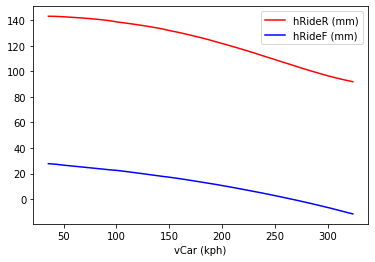

In [8]:
x = job_0.vector_as('vCar', 'kph')

plt.figure()
plt.xlabel('vCar (kph)')
plt.plot(x, job_0.vector_as('hRideR', 'mm'), 'r-', label='hRideR (mm)')
plt.plot(x, job_0.vector_as('hRideF', 'mm'), 'b-', label='hRideF (mm)')
plt.legend()
plt.show()

## Loading for an entire study

We can load the vector results for the entire study by passing a list of channels to the `load_study` function.

We'll also load the study scalar results for context.

In [9]:
study = await canopy.load_study(
    session,
    study_id,
    'ApexSim',
    channel_names=[
        'vCar',
        'hRideF',
        'hRideR'
    ],
    include_study_scalar_results=True)

INFO:canopy.load_study_job:Loading job index 0
INFO:canopy.load_study_job:Loading job index 1
INFO:canopy.load_study_job:Loading job index 2


0
1
2


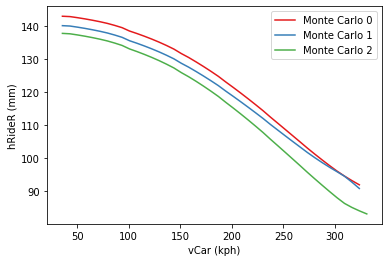

In [10]:
plt.figure()
plt.xlabel('vCar (kph)')
plt.ylabel('hRideR (mm)')

colors = plt.cm.Set1.colors

for index, job in enumerate(study.jobs):
    print(index)
    plt.plot(
        job.vector_as('vCar', 'kph'),
        job.vector_as('hRideR', 'mm'),
        label=job.document.name,
        color=colors[index % len(colors)])
plt.legend()
plt.show()

If we want to understand exactly what changed for these three jobs to produce these results, we can look at the inputs in the scalar results:

In [11]:
study.scalar_results.inputs

,car.chassis.carRunningMass.mCar+,car.chassis.ICar+,car.chassis.hRideFSetup+,car.chassis.hRideRSetup+
0,6.319281,"[4.47892127767,0.0,0.0,0.0,8.95784255534,0.0,0...",0.004119,0.017813
1,-0.325107,"[-5.48765997191,0.0,0.0,0.0,-10.97531994382,0....",0.000353,0.014984
2,9.916108,"[9.87416220823,0.0,0.0,0.0,19.74832441646,0.0,...",0.005481,0.012640


## Interactive Plots

We can create an interactive plot with a library like Bokeh. You will need to view this in a notebook viewer which supports interactive plots, as it won't render on GitHub.

The following code creates two stacked plots with linked X axes, so that as you pan and zoom the charts stay in sync.

In [26]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.palettes import Category10
output_notebook()

p1 = figure(
    plot_width=800,
    plot_height=300,
    y_axis_label='hRideF (mm)')

p2 = figure(
    plot_width=800,
    plot_height=300,
    x_axis_label='vCar (kph)', 
    y_axis_label='hRideR (mm)',
    x_range=p1.x_range)

for index, job in enumerate(study.jobs):
    p1.line(
        job.vector_as('vCar', 'kph'), 
        job.vector_as('hRideF', 'mm'), 
        color=Category10[10][index % 10], alpha=0.5)

    p2.line(
        job.vector_as('vCar', 'kph'), 
        job.vector_as('hRideR', 'mm'), 
        color=Category10[10][index % 10], alpha=0.5)

grid = gridplot([[p1], [p2]])
show(grid)